Data Wrangling & Feature Engineering

In [3]:
!pip install -q windrose

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from windrose import WindroseAxes
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
%matplotlib inline 

os.getcwd()

'/content'

In [69]:
df=pd.read_csv('/content/Wind_Turbine_power.csv')
df.head(5)

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


In [70]:
#rename kolom
df.columns =['Datetime','Power','Wind_speed','Theoretical_power','Wind_direction']
df.columns

Index(['Datetime', 'Power', 'Wind_speed', 'Theoretical_power',
       'Wind_direction'],
      dtype='object')

In [71]:
#ubah colums Date/Time menjadi format datetime 
df['Datetime']=pd.to_datetime(df.Datetime)
#lalu ubah datetime menjadi index
df.set_index('Datetime',inplace=True)


In [72]:
df.describe()

,Power,Wind_speed,Theoretical_power,Wind_direction
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


In [35]:
#meliat range waktu pada dataset
print(df.index.min())
print(df.index.max())

2018-01-01 00:00:00
2018-12-31 23:50:00


In [73]:
#menambahkan kolom loss_power
df['Loss_power']=df['Theoretical_power']- df['Power']
df.head(5)

,Power,Wind_speed,Theoretical_power,Wind_direction,Loss_power
Datetime,,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,36.281117
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,66.148316
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,84.523429
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,96.481664
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,111.052276


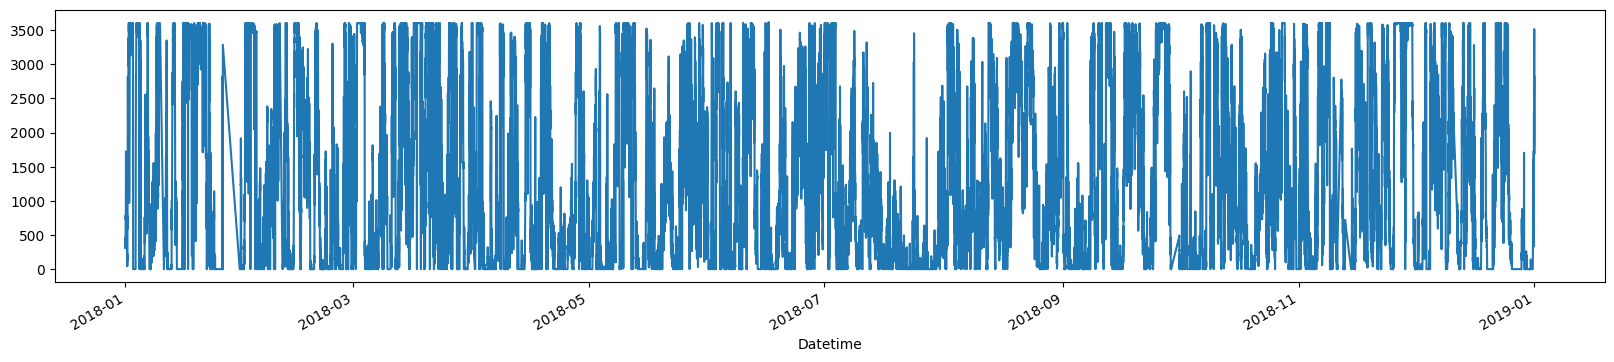

In [74]:
df.Power.plot(figsize=(20,4))
plt.show()

In [75]:
hourly = pd.DataFrame()
daily = pd.DataFrame()
weekly = pd.DataFrame()
monthly = pd.DataFrame()

for col in df.columns:
    weekly[col] = df[col].resample('W').mean()

for col in df.columns:
    monthly[col] = df[col].resample('M').mean()

for col in df.columns:
    daily[col] = df[col].resample('D').mean()

for col in df.columns:
    hourly[col] = df[col].resample('H').mean()

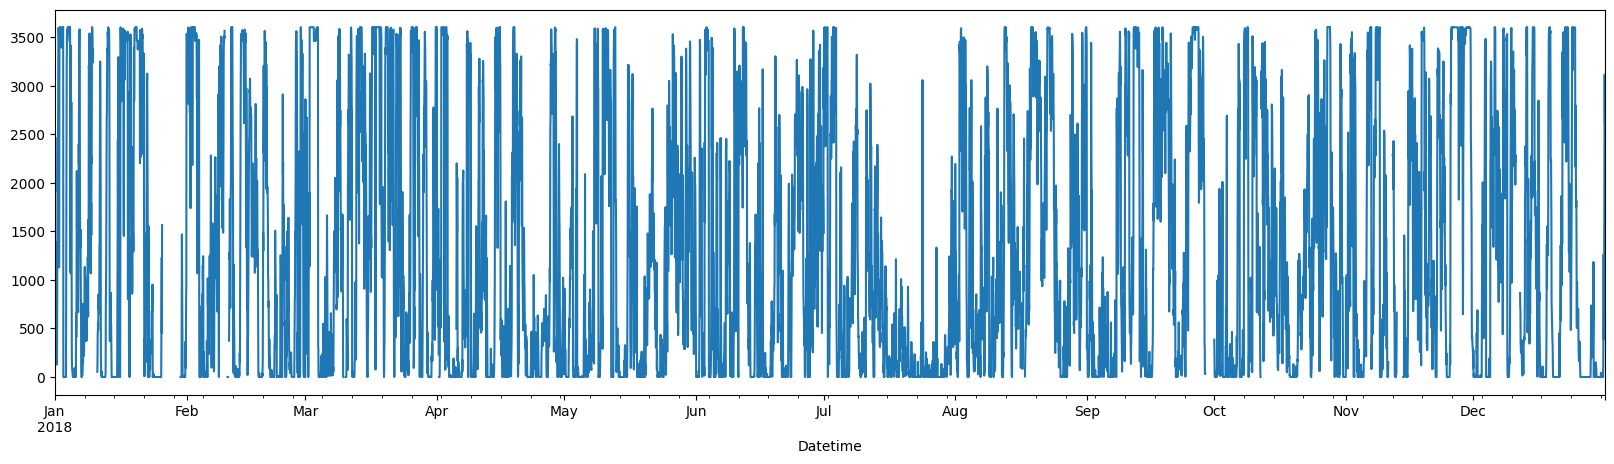

In [76]:
hourly.Power.plot(figsize=(20,5))
plt.show()

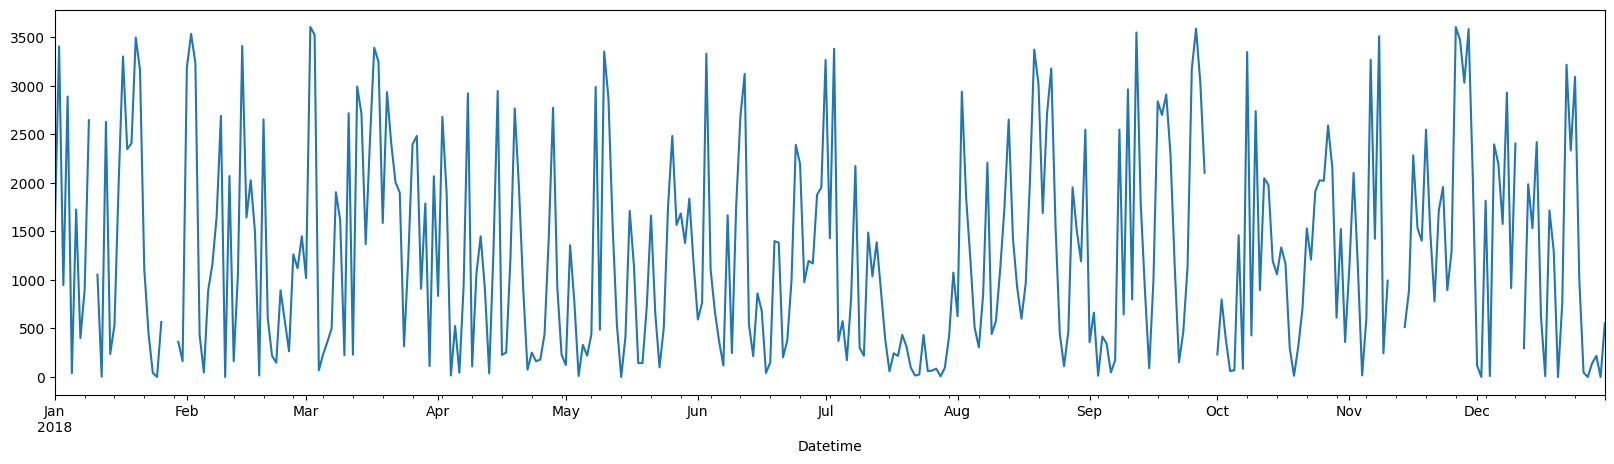

In [77]:
daily.Power.plot(figsize=(20,5),label='daily')
plt.show()

In [78]:
# membuat func kategori arah mata angin  
def direction(x):
    if x > 348.75 or x<11.25: return 'N'
    if x < 33.75: return 'NNE'
    if x < 56.25: return 'NE'
    if x < 78.75: return 'ENE'
    if x < 101.25: return 'E'
    if x < 123.75: return 'ESE'
    if x < 146.25: return 'SE'
    if x < 168.75: return 'SSE'
    if x < 191.25: return 'S'
    if x < 213.75: return 'SSW'
    if x < 236.25: return 'SW'
    if x < 258.75: return 'WSW'
    if x < 281.25: return 'W'
    if x < 303.75: return 'WNW'
    if x < 326.25: return 'NW'
    else: return 'NNW'

In [79]:
for col in daily.columns:
  daily[col] =daily[col].interpolate()

In [80]:
#membuat kolom kategorikan mengguakan fungsi arah mata angin yang telah dibuat
daily['Direction'] = daily['Wind_direction'].apply(direction)

In [81]:
#melihat nilai unik pada kolom direction
daily['Direction'].unique()

array(['SW', 'SSW', 'SE', 'WSW', 'NE', 'ENE', 'E', 'WNW', 'NNE', 'SSE',
       'W', 'ESE', 'S', 'NW'], dtype=object)

In [82]:
daily.head(3)

,Power,Wind_speed,Theoretical_power,Wind_direction,Loss_power,Direction
Datetime,,,,,,
2018-01-01,1535.204483,8.022975,1622.990048,229.735242,87.785565,SW
2018-01-02,3402.762686,14.954779,3443.060749,201.743605,40.298063,SSW
2018-01-03,946.059177,6.628723,1189.168580,143.141018,243.109404,SE


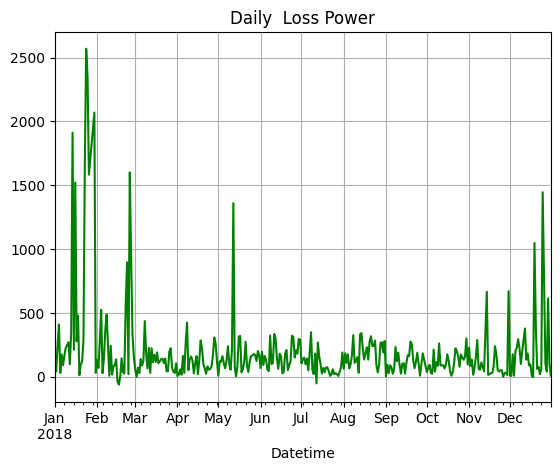

In [85]:
daily['Loss_power'].plot(color='g')
plt.grid()
plt.title('Daily  Loss Power')
plt.show()

dilihat dari grafik loss power kita lihat bahwa sepanjang tahun power turbin mengalami kehilangan daya, kita asumsikan bahwa kurangnya pemeliharaan turbin

jika diantara **(3,3-3,8m/s) **turbin menghasilkan listrik. Jika kecepatan angin **lebih tinggi dari 3,3 m/s** dan keluaran daya sebesar 0 maka asumsi turbin dalam pemeliharaan


In [86]:
print(max(df.Wind_speed))

25.2060108184814


In [87]:
#membuat data frame dimana power <=0 dan kecepatan angin > 3.3
df_as=df[~((df.Power<=0)&(df.Wind_speed>3.3))]

In [89]:
df_as.head(5)

,Power,Wind_speed,Theoretical_power,Wind_direction,Loss_power
Datetime,,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,36.281117
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,66.148316
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,84.523429
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,96.481664
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,111.052276


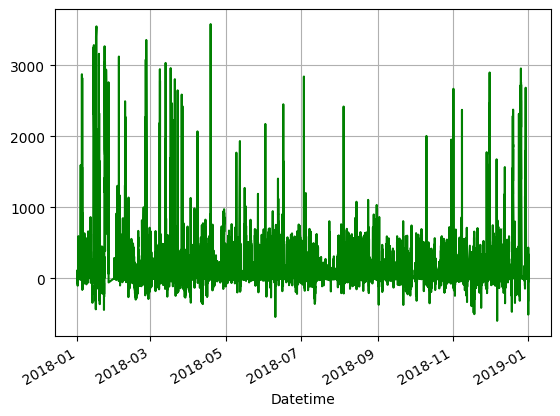

In [93]:
df_as.Loss_power.plot(color='g')
plt.grid()

In [95]:
#membuat func x y untuk arah mata angin
def x_y_component(wind_direction, wind_speed):
    #convert to radians 
    radians = (wind_direction * np.pi)/180
    # give the x, y compenents 
    x = wind_speed * np.cos(radians)
    y = wind_speed * np.sin(radians)
    
    return x,y

In [97]:
#buat 2 kolom pada df_as dengan komponen x y untuk arah mata angin
df_as['x_com'],df_as['y_com']=x_y_component(df_as.Wind_direction,
                                            df_as.Wind_speed)

<ipython-input-97-8f4c579ba64e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_as['x_com'],df_as['y_com']=x_y_component(df_as.Wind_direction,
<ipython-input-97-8f4c579ba64e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_as['x_com'],df_as['y_com']=x_y_component(df_as.Wind_direction,


In [98]:
df_as.head(3)

,Power,Wind_speed,Theoretical_power,Wind_direction,Loss_power,x_com,y_com
Datetime,,,,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,36.281117,-0.922769,-5.230563
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,66.148316,-0.134514,-5.670572
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,84.523429,0.233413,-5.210812


In [100]:
#resampel untuk tidak adanya pemeliharaan (nm) pada turbin
hourly_nm = pd.DataFrame()
daily_nm = pd.DataFrame()
weekly_nm = pd.DataFrame()
monthly_nm = pd.DataFrame()

columns = ['Power','Wind_speed','Theoretical_power','Wind_direction','Loss_power','x_com','y_com']

for column in columns:
    hourly_nm[column] = df_as[column].resample('H').mean()

for column in columns:
    daily_nm[column] = df_as[column].resample('D').mean()

for column in columns:
    weekly_nm[column] = df_as[column].resample('W').mean()
    
for column in columns:
    monthly_nm[column] = df_as[column].resample('M').mean()

<ipython-input-103-795b768d24b7>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  hourly_nm['2018-10'].Power.plot(figsize=(15,6),color='g')


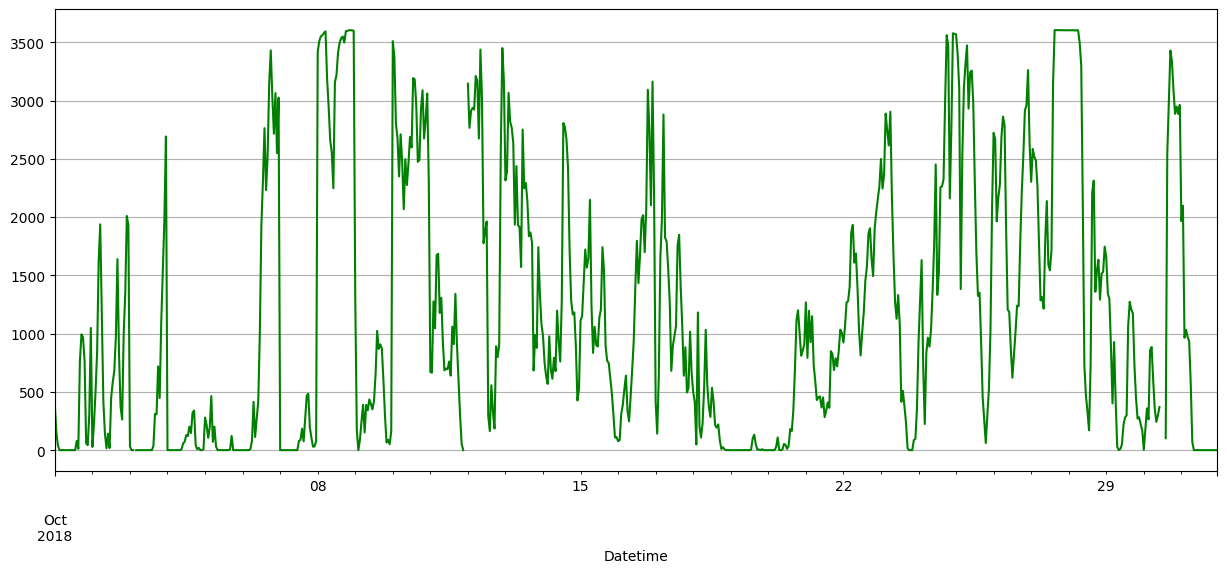

In [103]:
hourly_nm['2018-10'].Power.plot(figsize=(15,6),color='g')
plt.grid()
plt.show()

In [104]:
for column in hourly_nm.columns:
    hourly_nm[column] = hourly_nm[column].interpolate()

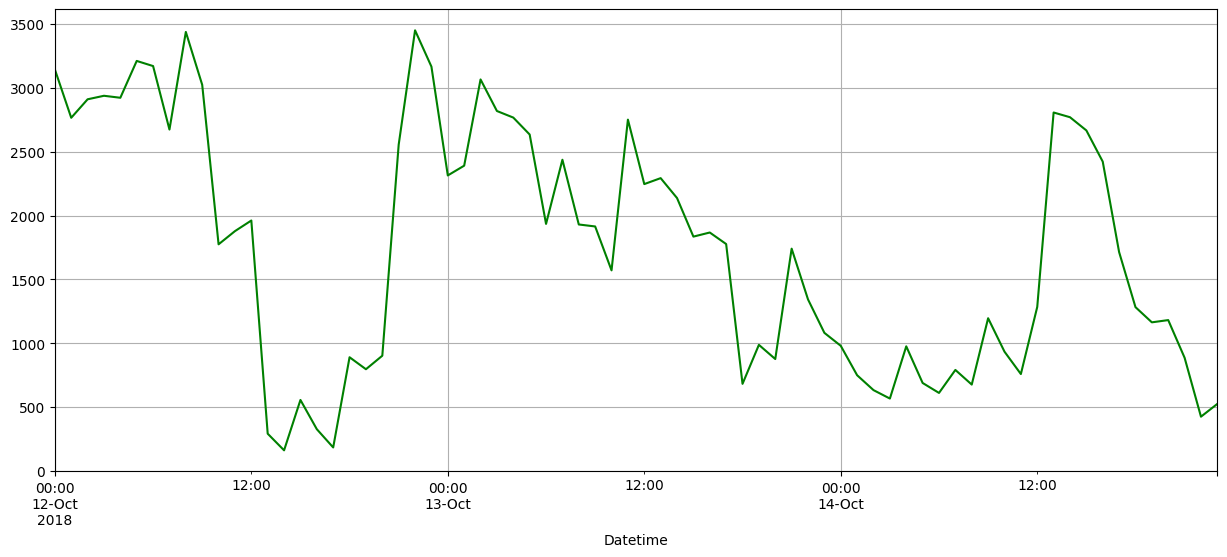

In [105]:
hourly_nm['2018-10-12':'2018-10-14'].Power.plot(figsize=(15,6),color='g')
plt.grid()
plt.show()

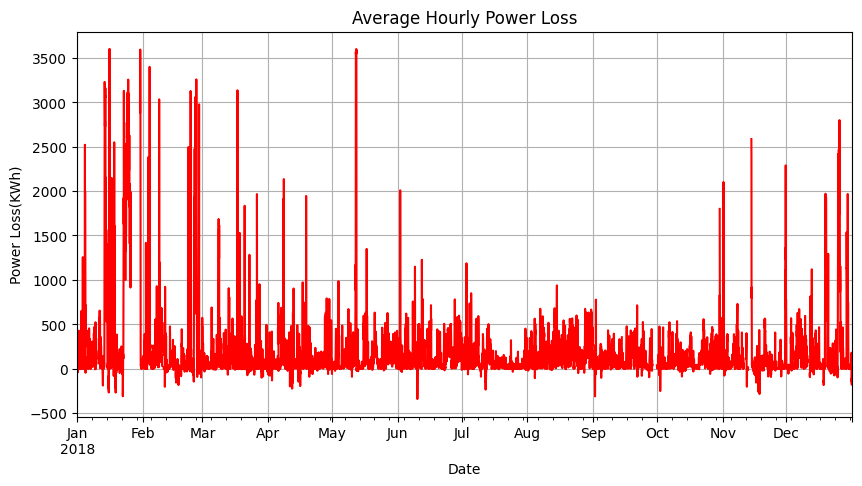

In [107]:
#perbandingan ketika adanya pemeliharaan dan tidak adanya pemeliharaan
hourly.Loss_power.plot(figsize=(10,5),color='r')
plt.title('Average Hourly Power Loss')
plt.grid()
plt.xlabel('Date')
plt.ylabel('Power Loss(KWh)')
plt.show()

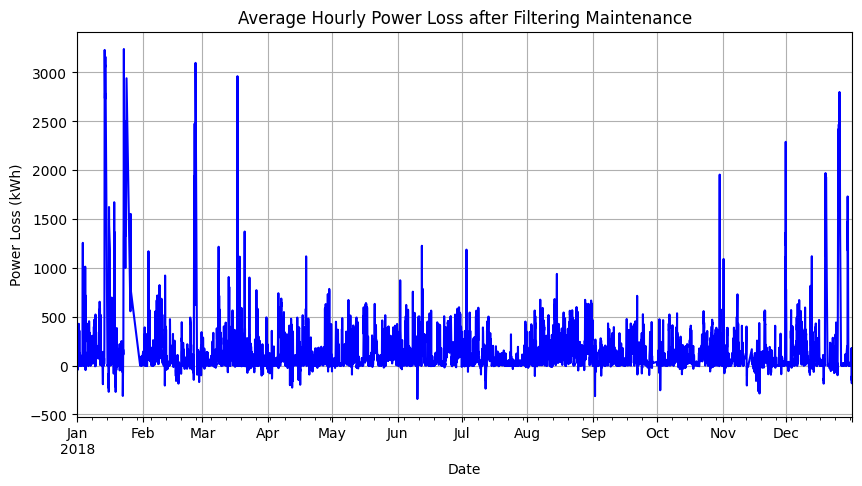

In [108]:
hourly_nm.Loss_power.plot(figsize=(10,5),color='b')
plt.title('Average Hourly Power Loss after Filtering Maintenance')
plt.grid()
plt.ylabel('Power Loss (kWh)')
plt.xlabel('Date')
plt.show()

Dari filter data saat turbin dalam pemeliharaaan, dalam sepanjang tahun loss power dapat diminimalisir, tetapi selama **Januari - Maret dan Desember** loss power masih terpantau ekstream

In [112]:
hourly_nm[hourly_nm.Loss_power>500].head(5)

,Power,Wind_speed,Theoretical_power,Wind_direction,Loss_power,x_com,y_com
Datetime,,,,,,,
2018-01-03 14:00:00,407.834712,5.950712,1041.095307,198.499530,633.260595,-5.527507,-2.119578
2018-01-03 15:00:00,611.752068,7.415358,1556.297757,200.847916,944.545689,-6.834035,-2.815493
2018-01-03 16:00:00,815.669423,8.880004,2071.500206,203.196302,1255.830783,-8.140562,-3.511408
2018-01-04 15:00:00,2882.950562,17.515313,3600.000000,225.292274,717.049438,-12.333057,-12.430648
2018-01-04 18:00:00,2543.731364,11.341170,3377.129777,244.826136,833.398413,-4.750560,-10.154731


In [113]:
hourly_nm[((hourly_nm['Wind_speed']<6) & (hourly_nm['Power']<100))].head()

,Power,Wind_speed,Theoretical_power,Wind_direction,Loss_power,x_com,y_com
Datetime,,,,,,,
2018-01-03 05:00:00,0.0,3.117675,20.873396,45.444939,20.873396,2.187343,2.221582
2018-01-03 06:00:00,0.0,2.618026,0.000000,67.461723,0.000000,1.009629,2.347345
2018-01-03 07:00:00,0.0,1.379726,0.000000,59.512788,0.000000,0.674892,1.106555
2018-01-03 08:00:00,0.0,1.750435,0.000000,135.472839,0.000000,-1.205925,0.425884
2018-01-03 09:00:00,0.0,2.610759,0.000000,194.624153,0.000000,-2.517372,-0.628804


In [114]:
hourly_nm[((hourly_nm['Power']==0) & (hourly_nm['Theoretical_power']>0))].describe()

,Power,Wind_speed,Theoretical_power,Wind_direction,Loss_power,x_com,y_com
count,342.0,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,0.0,2.673598,8.516969,152.641287,8.516969,0.653788,0.392846
std,0.0,0.352442,6.365286,100.419425,6.365286,1.687641,1.835662
min,0.0,1.084588,2.677069,3.868128,2.677069,-3.179712,-2.993325
25%,0.0,2.451763,3.721291,62.099439,3.721291,-0.771290,-1.236663
50%,0.0,2.717654,5.902629,129.621741,5.902629,1.016560,0.808879
75%,0.0,2.942203,10.831561,245.501145,10.831561,2.078798,2.079216
max,0.0,3.258679,29.649122,350.963593,29.649122,3.182080,3.200312


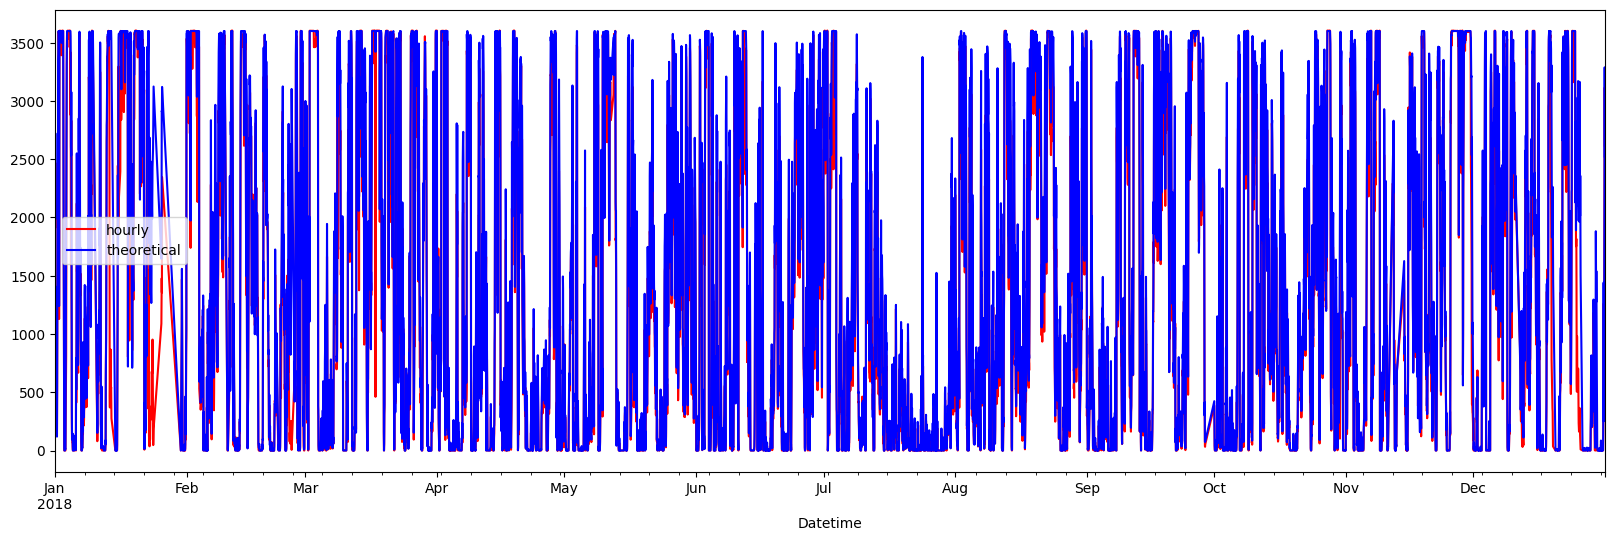

In [116]:
hourly_nm['Power'].plot(figsize=(20,6),label='hourly',color='r')
hourly_nm['Theoretical_power'].plot(label='theoretical',color='b')
plt.legend()
plt.show()

In [121]:
df["Direction"]=df.Wind_direction.apply(direction)
df.head(4)

,Power,Wind_speed,Theoretical_power,Wind_direction,Loss_power,Direction
Datetime,,,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,36.281117,W
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,66.148316,W
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,84.523429,W
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,96.481664,W


In [122]:
#menambahkan direction column kesetiap waktu
dfs = [hourly_nm, daily_nm, weekly_nm, monthly_nm]

for df in dfs:
    df['Direction'] = df['Wind_direction'].apply(direction)

monthly_nm.head(3)

,Power,Wind_speed,Theoretical_power,Wind_direction,Loss_power,x_com,y_com,Direction
Datetime,,,,,,,,
2018-01-31,1850.697339,9.677318,2113.510437,151.037688,262.813098,-2.443793,0.042538,SSE
2018-02-28,1563.237064,8.278136,1698.103519,123.957022,134.866455,-1.588200,2.584775,SE
2018-03-31,1832.531394,9.310503,1932.329374,158.755229,99.797980,-4.802351,-0.804414,SSE


In [123]:
#membuat func untuk mengetahui rata-rata kecepatan angin
def mean_wind(x):
    intervals = [*np.arange(0.25,26,0.5)]

    for i in intervals:
            if x < i: 
                x=i-0.25
                return x

In [156]:
df_as['Mean_speed']=df_as.Wind_speed.apply(mean_wind)

In [157]:
df_as.sample(5)

,Power,Wind_speed,Theoretical_power,Wind_direction,Loss_power,x_com,y_com,Mean_speed
Datetime,,,,,,,,
2018-11-19 04:20:00,3463.259033,17.330641,3600.000000,180.250793,136.740967,-17.330475,-0.075859,17.5
2018-11-17 01:10:00,1119.975952,7.373942,1193.625847,52.316448,73.649894,4.507690,5.835731,7.5
2018-06-19 22:50:00,1717.902954,8.847614,2046.255853,56.916359,328.352899,4.829583,7.413191,9.0
2018-10-19 19:00:00,0.000000,3.183470,24.563940,73.384613,24.563940,0.910300,3.050547,3.0
2018-01-31 16:40:00,0.000000,3.004356,16.140907,259.011414,16.140907,-0.572671,-2.949272,3.0


Karena daya harian yang dihasilkan akan digunakan untuk analisis, fungsi autokorelasi dan autokorelasi parsial akan digunakan untuk melihat apakah ada kesamaan antara pengamatan fungsi langkah waktu sebelumnya.

**ACF** : memeriksa untuk melihat apakah langkah waktu sebelumnya berdampak pada langkah waktu berikutnya
**PCF** : lihat kelambatan mana yang berdampak pada langkah waktu berikutnya.

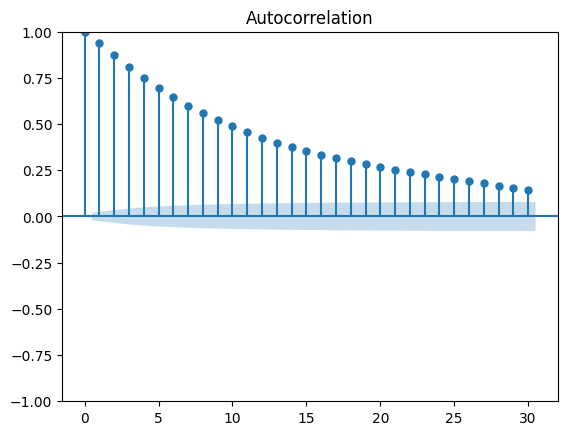

In [158]:
plot_acf(hourly_nm['Power'], lags=30)
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


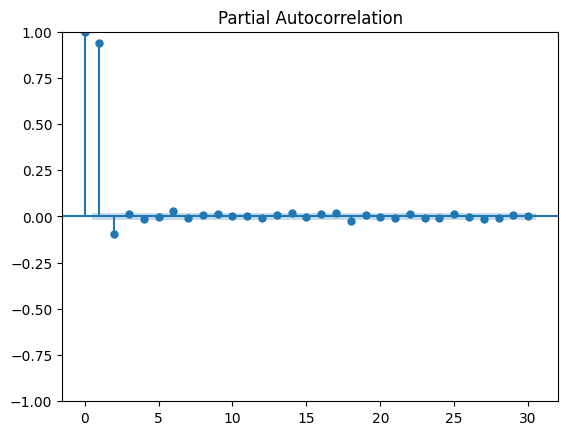

In [159]:
plot_pacf(hourly_nm['Power'], lags=30)
plt.show()

In [160]:
hourly_nm['T_1'] = hourly_nm['Power'].shift(1)

In [161]:
hourly_nm = hourly_nm.dropna()

In [162]:
hourly_nm.head(3)

,Power,Wind_speed,Theoretical_power,Wind_direction,Loss_power,x_com,y_com,Direction,T_1
Datetime,,,,,,,,,
2018-01-01 02:00:00,733.655375,6.452037,788.401310,268.397466,54.745935,-0.176225,-6.440522,W,460.537125
2018-01-01 03:00:00,909.362081,6.811455,948.793346,256.014765,39.431265,-1.652917,-6.596464,WSW,733.655375
2018-01-01 04:00:00,1393.518188,7.748749,1406.391795,247.652468,12.873607,-2.912491,-7.138868,WSW,909.362081


**EDA (Exploration Data Analysis**

In [142]:
columns = ['Power', 'Wind_speed', 'Theoretical_power', 'Loss_power','x_com','y_com']
for column in columns:
    feature = hourly_nm[column]
    split = round(len(feature)/2)
    X_1,X_2 = feature[:split], feature[split:]
    mean_1,mean_2 = X_1.mean(), X_2.mean()
    var_1,var_2 = X_1.var(), X_2.var()
    print('For {}'.format(column))
    print('mean1=%f, mean2=%f' % (mean_1, mean_2))
    print('variance1=%f, variance2=%f' % (var_1, var_2))
    print('')

For Power
mean1=1367.149891, mean2=1269.121349
variance1=1673134.481111, variance2=1559169.553640

For Wind_speed
mean1=7.689411, mean2=7.236624
variance1=19.344318, variance2=15.198110

For Theoretical_power
mean1=1551.553324, mean2=1403.031542
variance1=1850154.470182, variance2=1703647.960809

For Loss_power
mean1=184.403433, mean2=133.910193
variance1=141388.085660, variance2=57103.678486

For x_com
mean1=-0.423583, mean2=1.274358
variance1=46.681277, variance2=35.187456

For y_com
mean1=1.955882, mean2=2.309582
variance1=27.058030, variance2=24.877719



Hipotesis Null (H0): Jika gagal ditolak, maka time series tersebut memiliki unit root, artinya non-stasioner. Ini memiliki beberapa struktur tergantung waktu.

Hipotesis Alternatif (H1): Hipotesis nol ditolak; itu menunjukkan deret waktu tidak memiliki akar unit, artinya stasioner. Itu tidak memiliki struktur yang bergantung pada waktu.

p-value > 0.05: Gagal menolak hipotesis nol (H0), data memiliki akar unit dan tidak stasioner.
p-value <= 0,05: Tolak hipotesis nol (H0), data tidak memiliki unit root dan stasioner.

In [144]:
from statsmodels.tsa.stattools import adfuller
adfull = {}

for column in columns:
    X = hourly_nm[column].values
    result = adfuller(X)
    adfull[column] = [result[1]]

    print('P-value for {}: {}'.format(column,result[1]))

P-value for Power: 3.1768843000927696e-29
P-value for Wind_speed: 4.8283183939692944e-24
P-value for Theoretical_power: 1.9339076618978444e-29
P-value for Loss_power: 1.083701654783985e-27
P-value for x_com: 2.5917663452624356e-23
P-value for y_com: 3.202796046141601e-15


In [145]:
adfull_df = pd.DataFrame.from_dict(adfull)  

Dapat disimpulkan bahwa semua fitur tidak mengikuti jalan acak dan stasioner.

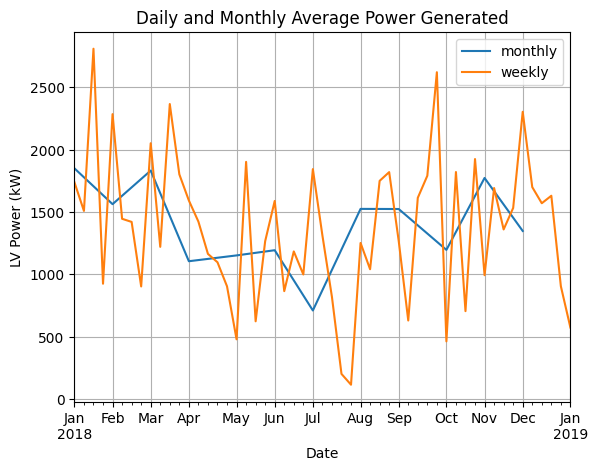

In [146]:
monthly_nm['Power'].plot(label='monthly')
weekly_nm['Power'].plot(label='weekly')
plt.title('Daily and Monthly Average Power Generated')
plt.ylabel('LV Power (kW)')
plt.grid()
plt.xlabel('Date')
plt.legend()
plt.show()

<ipython-input-152-5b67feefe1ce>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_as['Power'],shade=True)


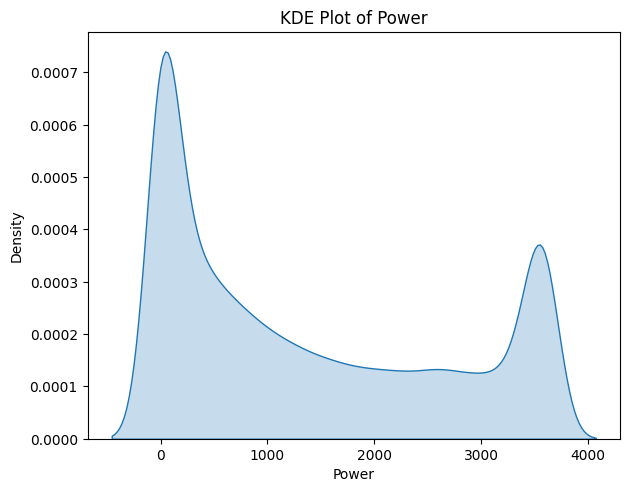

In [152]:
#plot kde of power 
sns.kdeplot(df_as['Power'],shade=True)
plt.tight_layout()
plt.title('KDE Plot of Power')
plt.show()

<ipython-input-154-e06d80099bf9>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_as['Wind_speed'],shade=True)


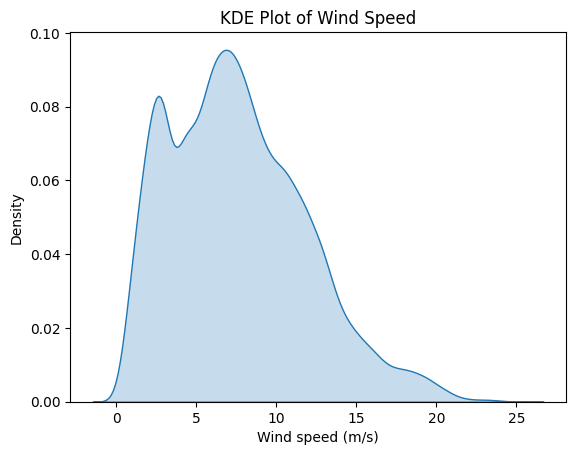

In [154]:
#plot kde of wind speed
sns.kdeplot(df_as['Wind_speed'],shade=True)
plt.title('KDE Plot of Wind Speed')
plt.xlabel('Wind speed (m/s)')
plt.show()

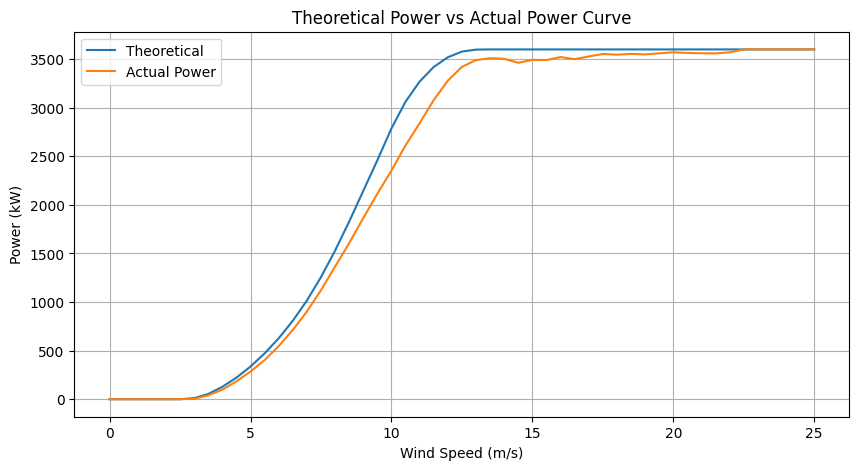

In [164]:
m_s_t_se = df_as.groupby('Mean_speed')['Theoretical_power'].mean()
m_s_p_se = df_as.groupby('Mean_speed')['Power'].mean()
plt.figure(figsize=(10,5))
plt.tight_layout()
plt.plot(m_s_t_se,label='Theoretical')
plt.plot(m_s_p_se,label='Actual Power')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power (kW)')
plt.title('Theoretical Power vs Actual Power Curve')
plt.grid(which='major')
plt.legend()
plt.show()

In [165]:
df.columns

Index(['Power', 'Wind_speed', 'Theoretical_power', 'Wind_direction',
       'Loss_power', 'x_com', 'y_com', 'Direction'],
      dtype='object')

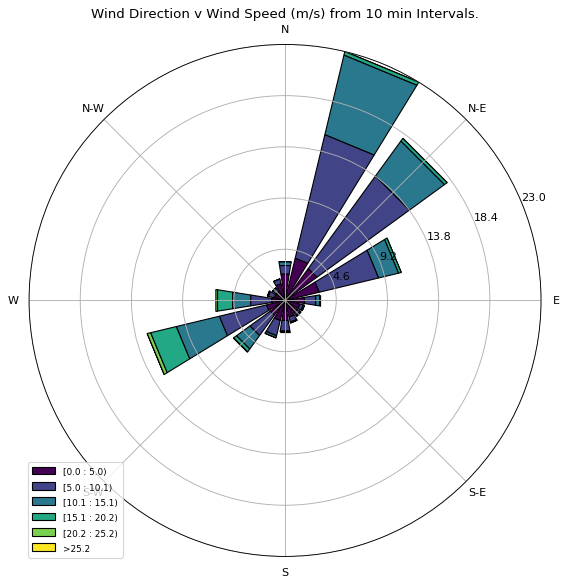

In [167]:
ax = WindroseAxes.from_ax()
ax.bar(df_as['Wind_direction'], df_as['Wind_speed'], normed=True, opening=0.8, edgecolor='black')
ax.set_theta_direction('clockwise')
ax.set_theta_zero_location('N')
ax.set_xticklabels(['N', 'N-E', 'E', 'S-E', 'S', 'S-W', 'W', 'N-W'])
ax.set_legend()
plt.title('Wind Direction v Wind Speed (m/s) from 10 min Intervals.')
plt.show()

In [168]:
df_as['Direction'] = df_as['Wind_direction'].apply(direction)

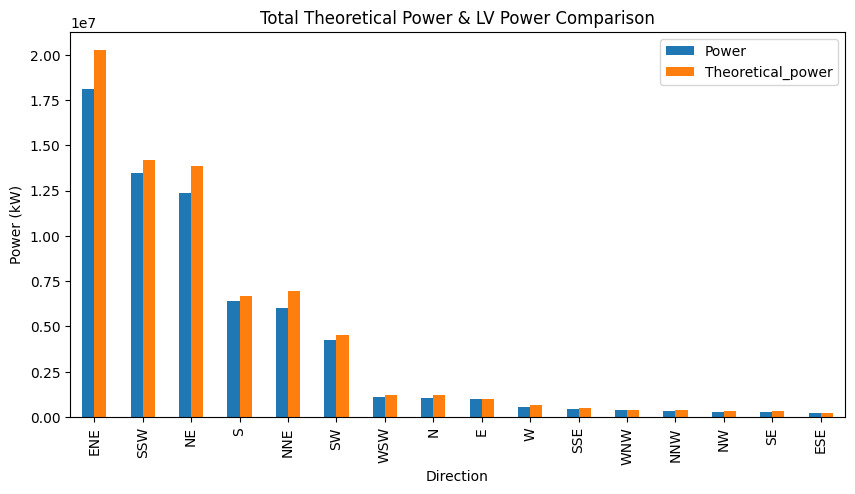

In [169]:
direction_df = df_as.groupby('Direction')[['Power','Theoretical_power']].sum()
direction_df = direction_df.sort_values(by=['Power'],ascending=False)
direction_df.plot(kind='bar',figsize=(10,5))
plt.title('Total Theoretical Power & LV Power Comparison')
plt.ylabel('Power (kW)')
plt.show()

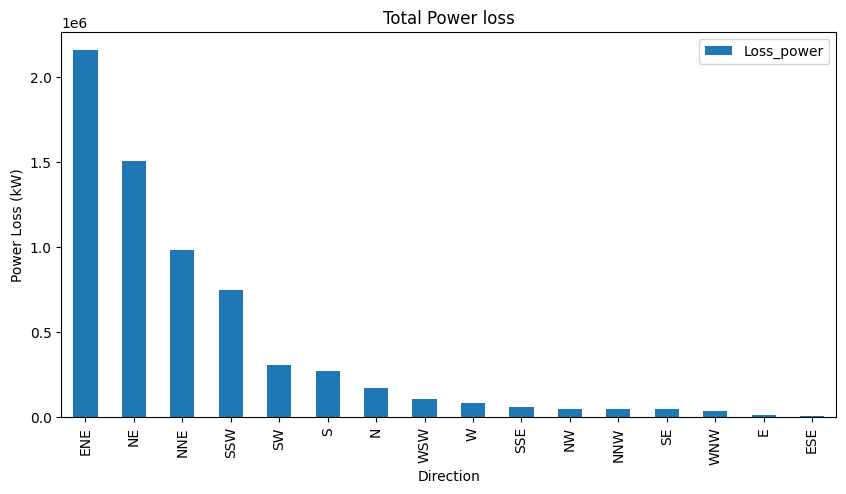

In [173]:
# summary df of grouped daily direction 
dir_loss = df_as.groupby('Direction')[['Loss_power']].sum()
dir_loss = dir_loss.sort_values(by=['Loss_power'],ascending=False)
dir_loss.plot(kind='bar', figsize=(10,5))
plt.title('Total Power loss')
plt.ylabel('Power Loss (kW)')

plt.show()

Pertimbangkan kehilangan daya terbesar berada di ENE, NE, NNE dan SSW.

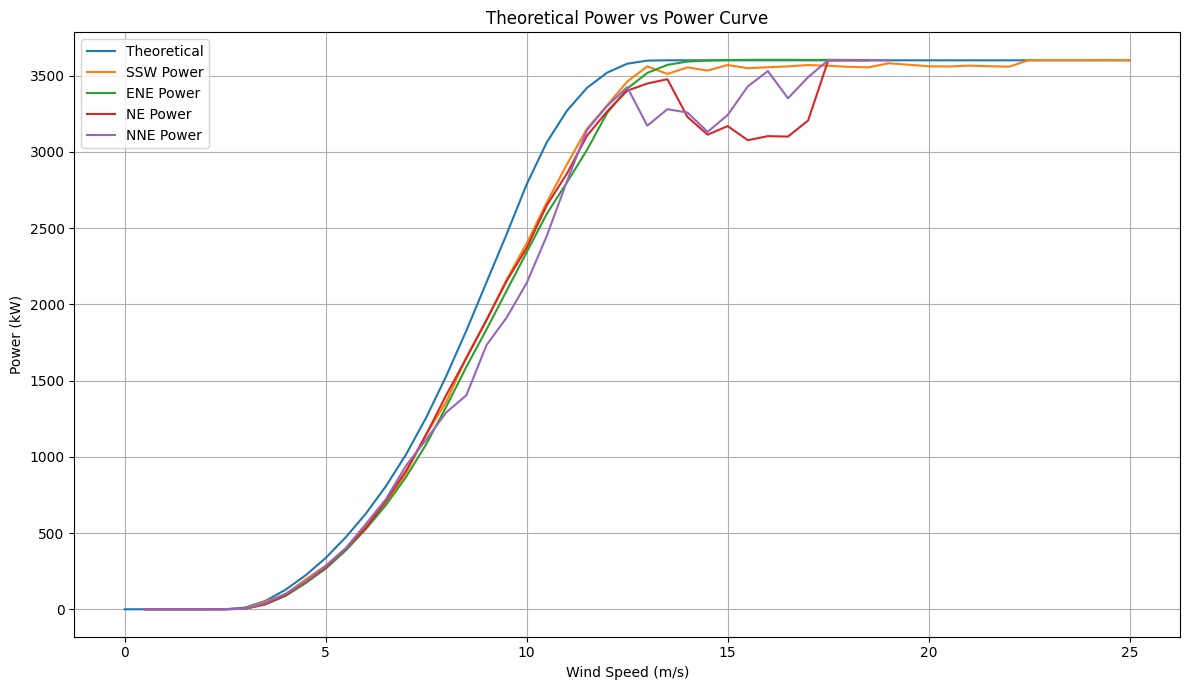

In [175]:
NNE = df_as[df_as['Direction']=='NNE']
ENE = df_as[df_as['Direction']=='ENE']
NE = df_as[df_as['Direction']=='NE']
SSW = df_as[df_as['Direction']=='SSW']
m_s_p_nne = NNE.groupby('Mean_speed')['Power'].mean()
m_s_p_ene = ENE.groupby('Mean_speed')['Power'].mean()
m_s_p_ne = NE.groupby('Mean_speed')['Power'].mean()
m_s_p_ssw = SSW.groupby('Mean_speed')['Power'].mean()
SSW = df_as[df_as['Direction']=='SSW']
m_s_p_ssw = SSW.groupby('Mean_speed')['Power'].mean()
plt.figure(figsize=(12,7))
plt.plot(m_s_t_se,label='Theoretical')
plt.plot(m_s_p_ssw,label='SSW Power')
plt.plot(m_s_p_ene,label='ENE Power')
plt.plot(m_s_p_ne,label='NE Power')
plt.plot(m_s_p_nne,label='NNE Power')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power (kW)')
plt.title('Theoretical Power vs Power Curve')
plt.grid(which='major')
plt.legend()
plt.tight_layout()
plt.show()

In [177]:
#test co-integration between features
import statsmodels.api as sm

num_columns = ['Wind_speed', 'Theoretical_power', 'Loss_power','x_com','y_com']
P = hourly_nm[['Power']]
co_int = {}

for column in num_columns:
    C = hourly_nm[[column]]

    C = sm.add_constant(C)
    result = sm.OLS(P,C).fit()

    #value of the gradient 
    const = result.params[1]
    adf_g = adfuller(hourly_nm[column] - const*hourly_nm['Power'])
    
    co_int[column] = [adf_g[1]]
   
    print('The p-value for the ADF test between {} and Power is: {} '.format(column,adf_g[1]))

The p-value for the ADF test between Wind_speed and Power is: 3.169513489704802e-29 
The p-value for the ADF test between Theoretical_power and Power is: 7.465254305148033e-28 
The p-value for the ADF test between Loss_power and Power is: 9.502029336992202e-29 
The p-value for the ADF test between x_com and Power is: 3.1688644034456394e-29 
The p-value for the ADF test between y_com and Power is: 3.17083776292335e-29 


In [178]:
co_int_df = pd.DataFrame.from_dict(co_int)
co_int_df

,Wind_speed,Theoretical_power,Loss_power,x_com,y_com
0,3.169513e-29,7.465254e-28,9.502029e-29,3.168864e-29,3.170838e-29


Pengujian di atas menunjukkan bahwa semua kolom numerik berkointegrasi dengan fitur Power dari kumpulan data.

Karena Arah Angin dalam derajat bukan fitur yang cocok untuk RNN, fitur ini akan dihapus dari kumpulan data.

In [179]:
#drop coloums
hourly_nm.drop(labels=['Wind_direction','Direction'],axis=1,inplace=True)

In [180]:
hourly_nm

,Power,Wind_speed,Theoretical_power,Loss_power,x_com,y_com,T_1
Datetime,,,,,,,
2018-01-01 02:00:00,733.655375,6.452037,788.401310,54.745935,-0.176225,-6.440522,460.537125
2018-01-01 03:00:00,909.362081,6.811455,948.793346,39.431265,-1.652917,-6.596464,733.655375
2018-01-01 04:00:00,1393.518188,7.748749,1406.391795,12.873607,-2.912491,-7.138868,909.362081
2018-01-01 05:00:00,1149.599162,7.236854,1128.194441,-21.404721,-3.170687,-6.478943,1393.518188
2018-01-01 06:00:00,1100.074392,7.183671,1103.372815,3.298423,-2.907223,-6.565457,1149.599162
...,...,...,...,...,...,...,...
2018-12-31 19:00:00,1065.438416,6.481788,884.566693,-180.871722,0.539250,6.418344,386.752182
2018-12-31 20:00:00,1629.041504,8.083644,1593.819956,-35.221548,1.432138,7.954137,1065.438416
2018-12-31 21:00:00,2135.531637,9.121862,2224.666576,89.134939,1.610638,8.978355,1629.041504


In [181]:
hourly_nm.to_csv('hourly_nm.csv')